## Exercise 4.9 Part 2

### Step 1: Import Libraries and Dataset

In [3]:
# Create file path
path = r'C:\Users\gre60\Desktop\30-05-2024 Instacart Basket Analysis'

In [25]:
path_2 = r'/Users/gre604/Desktop/30-05-2024 Instacart Basket Analysis'

In [27]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
# Import Dataset
df = pd.read_pickle(os.path.join(path_2,'Data', 'Prepared Data', 'agg_cust_ords_prods_merge.pkl'))

In [4]:
# Checking results
df.head()

,user_id,gender,state,age,date_joined,number_of_dependents,family_status,income,product_id,product_name,...,busiest_day,busiest_days,busiest_period_of_day,max_orders,loyalty_flag,average_spend,spending_flag,customer_frequency,frequency_flag,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [5]:
# Checking dimensions
df.shape

(32404859, 32)

### Step 2: You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

Text(0.5, 1.0, 'Orders by Hour')

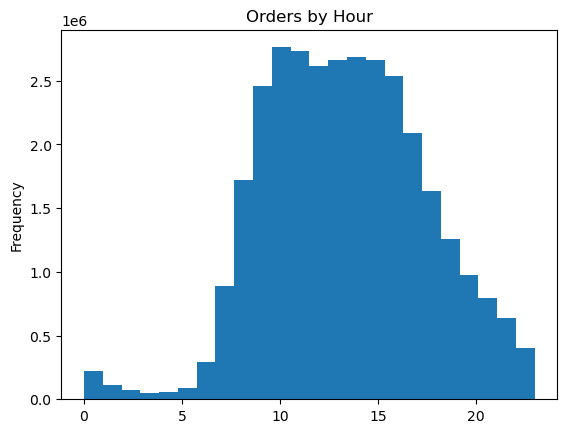

In [17]:
hist = df['order_hour_of_day'].plot.hist(bins = 24)

plt.title('Orders by Hour')

#### The histogram clearly illustrates that most orders occur betwwen 10AM to 3PM. Then there is a decline in the number of orders after 3PM. 

### Step 4: The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

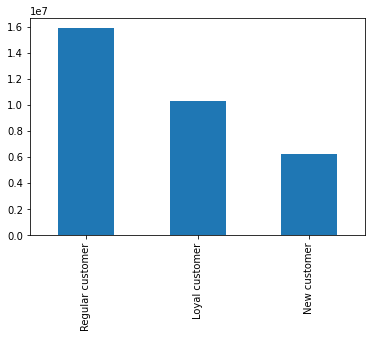

In [7]:
bar = df['loyalty_flag'].value_counts().plot.bar()

### Step 5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [25]:
# Set the seed for the random number generator.
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [27]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [29]:
# 70/30 data sample splits
big = df[dev]
small = df[~dev]

In [11]:
len(big) + len(small)

32404859

In [12]:
df.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'family_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'first_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_orders', 'loyalty_flag', 'average_spend',
       'spending_flag', 'customer_frequency', 'frequency_flag', '_merge'],
      dtype='object')

In [23]:
# Using sample data for line chart
subset = small[['order_hour_of_day', 'prices']]

NameError: name 'small' is not defined

In [14]:
pd.option_context('mode.use_inf_as_na', True)

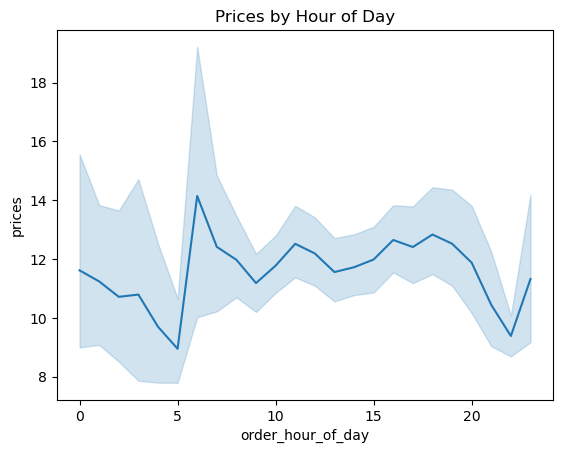

In [31]:
# Creating line chart with sample data
line = sns.lineplot(data = subset, x = 'order_hour_of_day', y = 'prices').set_title('Prices by Hour of Day')

### Step 6: Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [21]:
# Creating second subset based on age and family situation
subset_2 = small[['age', 'number_of_dependents']]

NameError: name 'small' is not defined

In [19]:
# Creating line chart
line_2 = sns.lineplot(data = subset_2, x = 'age', y = 'number_of_dependents').set_title('Age by Number of Dependents')

NameError: name 'subset_2' is not defined

#### The line chart shows that age and number of dependents varies from age and there is no significance.

### Step 7: You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

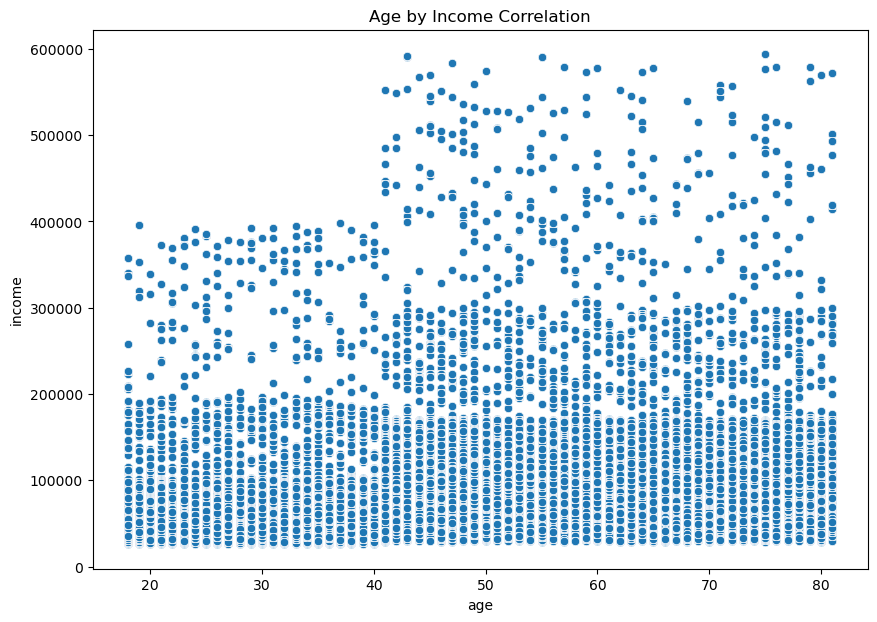

In [15]:
plt.figure(figsize=(10,7))
scatter = sns.scatterplot(x = 'age', y = 'income',data = df)
plt.title('Age by Income Correlation')
plt.show()

#### The scatterplot shows that income and age do not correlate and can vary. 

### Step 8: Export your visualizations as “.png” files in your relevant project folder.

In [19]:
hist.figure.savefig(os.path.join(path_2, 'Analysis','Visualizations', 'hist_order_hour_of_day_frequency.png'))

In [23]:
bar.figure.savefig(os.path.join(path_2, 'Analysis','Visualizations', 'loyalty_flag_distribution.png'))

In [35]:
line.figure.savefig(os.path.join(path_2, 'Analysis','Visualizations', 'change_in_price_over_hours_of_the_day.png'))

In [25]:
line_2.figure.savefig(os.path.join(path_2, 'Analysis','Visualizations', 'age_vs_n_dependants.png'))

In [17]:
scatter.figure.savefig(os.path.join(path_2, 'Analysis','Visualizations', 'change_in_spending_power_over_age.png'))